In [25]:
import pandas as pd
import numpy as np
uri = 'Titanic_sc_data.csv'
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,sex,pclass,who,alone,fare,sex_,pclass_,who_,alone_,fare_,survived_
0,0,male,3,adult,False,7.2500,1,2,0,0,18,0
1,1,female,1,adult,False,71.2833,0,0,0,0,207,1
2,2,female,3,adult,True,7.9250,0,2,0,1,41,1
3,3,female,1,adult,False,53.1000,0,0,0,0,189,1
4,4,male,3,adult,True,8.0500,1,2,0,1,43,0


In [26]:
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_'] # เลือกคอลัมน์ทำ normalization
X_before = df[col_select]

In [27]:
y_before = df['survived_']

In [28]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test_before,y_train,y_test_before = train_test_split(X_before, y_before, test_size=0.2, random_state= 2020) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

In [29]:
# สำหรับทำ Normalization 0-1 ลด Variance ให้เท่ากัน
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_'] # เลือกคอลัมน์ทำ normalization
X = df[col_select]
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)
y = df['survived_'] # เลือกคอลัมน์ output

In [30]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_sc, y, test_size=0.2, random_state= 2020) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

In [31]:
df.head()

,Unnamed: 0,sex,pclass,who,alone,fare,sex_,pclass_,who_,alone_,fare_,survived_
0,0,male,3,adult,False,7.2500,1,2,0,0,18,0
1,1,female,1,adult,False,71.2833,0,0,0,0,207,1
2,2,female,3,adult,True,7.9250,0,2,0,1,41,1
3,3,female,1,adult,False,53.1000,0,0,0,0,189,1
4,4,male,3,adult,True,8.0500,1,2,0,1,43,0


In [32]:
X_sc[:5]

array([[1.        , 1.        , 0.        , 0.        , 0.07317073],
       [0.        , 0.        , 0.        , 0.        , 0.84146341],
       [0.        , 1.        , 0.        , 1.        , 0.16666667],
       [0.        , 0.        , 0.        , 0.        , 0.76829268],
       [1.        , 1.        , 0.        , 1.        , 0.17479675]])

In [33]:
from sklearn.externals import joblib
import numpy as np

model = joblib.load('kNN_The_best_model.pkl') # โหลด Model จากไฟล์ .pkl มาใช้งาน

# sex pclass who alone fare สมมติเอา 
X_test[:5]

array([[1.        , 0.5       , 0.        , 1.        , 0.34552846],
       [1.        , 1.        , 0.        , 1.        , 0.2601626 ],
       [0.        , 1.        , 0.        , 0.        , 0.49186992],
       [1.        , 1.        , 0.        , 1.        , 0.54065041],
       [1.        , 1.        , 0.        , 0.        , 0.44308943]])

In [34]:
X_test_before.describe()

,sex_,pclass_,who_,alone_,fare_
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.606742,1.353933,0.084270,0.634831,98.915730
std,0.489851,0.832606,0.278575,0.482836,70.777432
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,40.000000
50%,1.000000,2.000000,0.000000,1.000000,85.000000
75%,1.000000,2.000000,0.000000,1.000000,140.750000
max,1.000000,2.000000,1.000000,1.000000,246.000000


# การประเมิณ model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model.predict(X_test)
y_pred = y_predict # กำหนดให้ yที่ทำนายได้ คือ y_pred
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Total X: 889
Total train: 711
Total test: 178
Score : 0.803
Accuracy Score: 0.803
              precision    recall  f1-score   support

  unsurvived       0.81      0.88      0.84       104
    survived       0.80      0.70      0.75        74

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[91 13]
 [22 52]]


In [36]:
cm[0,1]

13

In [37]:
y_pred[:5] 

array([0., 0., 0., 0., 0.])

# Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model, X_sc, y, cv= 10)
# ค่า confusion matrix ต่างๆคือ
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN, FP, FN, TP

precision_p = TP/(TP+FP)
precision_n = TN/(TN+FN)
recall_p = TP/(TP+FN)
recall_n = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:', (accuracy*100).round(2),'%')
print('Precision (Positive or survived):', precision_p.round(2))
print('Precision (Negative or unsurvived):',precision_n.round(2))
print('Recall (Positive or survived):', recall_p.round(2))
print('Recall (Negative or unsurvived):', recall_n.round(2))
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f}%'.format(cvs.mean()*100))  #ใช้เทียบกับ model อื่นๆ

Accuracy: 80.34 %
Precision (Positive or survived): 0.8
Precision (Negative or unsurvived): 0.81
Recall (Positive or survived): 0.7
Recall (Negative or unsurvived): 0.88
Cross val scores [0.764  0.8539 0.7303 0.8876 0.8652 0.8202 0.8427 0.7865 0.8764 0.8636]
mean 82.9060%


# วิเคราะห์ค่า Precision และ Recall ของ confusion matrix

Precision (Positive or survived): 0.8 ระบบทำนายว่าเป็น Positive(คนรอดชีวิต)จากการทำนายคนรอดชีวิต 65 คน มีทำนายถูกว่ารอดชีวิต 52 คน หรือ ทายว่ารอด 100 คน รอดจริง คือ 80 คน

Precision (Negative or unsurvived): 0.81 ระบบทำนายว่าเป็น Negative(คนไม่รอดชีวิต)จากการทำนายคนไม่รอดชีวิต 113 คน มีทำนายถูกว่าไม่รอดชีวิต 91 คน หรือ ทายว่ารอด 100 คน รอดจริง คือ 80 คน (0.8053)

Recall or sensitivity (Positive or survived): 0.7 ในความเป็นจริงมีคนรอดชีวิต 74 คน ทำนายถูก 52 คนว่ารอด หรือ ในความเป็นจริงมีคนรอดชีวิต 100 คน ทำนายถูกว่ารอด 70 คน

Recall or sensitivity (Negative or unsurvived): 0.88 ในความเป็นจริงมีคนไม่รอดชีวิต 104 คน ทำนายถูก 91 คนว่าไม่รอด หรือ ในความเป็นจริงมีคนไม่รอดชีวิต 100 คน ทำนายถูกว่าไม่รอด 87 คน (0.875)

ความถูกต้องของ model คือ 80.34% ทำนาย 100 คน ทำนายความถูกต้องว่า รอดชีวิต หรือ ไม่รอดชีวิต ได้ประมาณ 80 คน (80.34)

# Confusion Matrix_1 Label

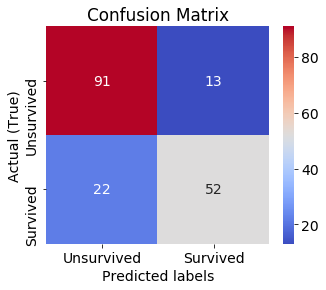

In [39]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix

# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")
y_targets = ['Unsurvived', 'Survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 


# Pipeline

- 1.Normalization
- 2.Label Encoding
- 3.predict model

sex, pclass, who, alone, fare

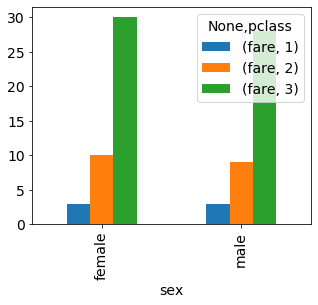

In [40]:
import pandas as pd

pvt = df[df.who=='child'].pivot_table(index= ['sex'], columns=['pclass'], values= ['fare'], aggfunc= 'count')
pvt.plot.bar()

In [41]:
df.describe()

,Unnamed: 0,pclass,fare,sex_,pclass_,who_,alone_,fare_,survived_
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,445.000000,2.311586,32.096681,0.649044,1.311586,0.093363,0.601800,105.019123,0.382452
std,256.998173,0.834700,49.697504,0.477538,0.834700,0.291105,0.489803,69.804510,0.486260
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.000000,2.000000,7.895800,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
50%,445.000000,3.000000,14.454200,1.000000,2.000000,0.000000,1.000000,94.000000,0.000000
75%,667.000000,3.000000,31.000000,1.000000,2.000000,0.000000,1.000000,157.000000,1.000000
max,890.000000,3.000000,512.329200,1.000000,2.000000,1.000000,1.000000,246.000000,1.000000


In [42]:
df[df.who=='child'].describe()

,Unnamed: 0,pclass,fare,sex_,pclass_,who_,alone_,fare_,survived_
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000,83.000000
mean,430.602410,2.626506,32.785795,0.481928,1.626506,1.0,0.072289,133.674699,0.590361
std,287.079319,0.619024,33.466438,0.502711,0.619024,0.0,0.260540,48.886905,0.494757
min,7.000000,1.000000,7.225000,0.000000,0.000000,1.0,0.000000,16.000000,0.000000
25%,171.500000,2.000000,15.900000,0.000000,1.000000,1.0,0.000000,107.000000,0.000000
50%,435.000000,3.000000,26.250000,0.000000,2.000000,1.0,0.000000,139.000000,1.000000
75%,705.500000,3.000000,32.193750,1.000000,2.000000,1.0,0.000000,160.500000,1.000000
max,875.000000,3.000000,211.337500,1.000000,2.000000,1.0,1.000000,239.000000,1.000000


In [ ]:
df[df['fare']=='low'].head()    

In [ ]:
df.fare = np.where(df['fare'] <= 7.895800, ['low'], df.fare) # 7.895800 (quatile=0.25)
df.fare = np.where(df['fare'] < 31.000000, ['medium'], df.fare) # 7.895800 (quatile=0.75)